<a href="https://colab.research.google.com/github/AtheerMalki/Module04_ML/blob/main/emp_churn_DT_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Predict Employee Churn with Decision Trees and Random Forests</h2>

### Project Structure

The hands on project on Predict Employee Churn with Decision Trees and Random Forests is divided into the following tasks:

#### Task 1: Introduction and Import Libraries

- Introduction to the data set and the problem overview.
- See a demo of the final product you will build by the end of this project.
- Import essential modules and helper functions from NumPy, Matplotlib, and scikit-learn.

#### Task 2: Exploratory Data Analysis

- Load the employee dataset using pandas
- Explore the data visually by graphing various features against the target with Matplotlib.

#### Task 3: Encode Categorical Features

- The dataset contains two categorical variables: Department and Salary.
- Create dummy encoded variables for both categorical variables.

#### Task 4: Visualize Class Imbalance

- Use Yellowbrick's Class Balance visualizer to create a frequency plot of both classes.
- The presence or absence of a class balance problem will inform your sampling strategory while creating training and validation sets.

#### Task 5: Create Training and Validation Sets

- Split the data into a 80/20 training/validation split.
- Use a stratified sampling strategy

#### Tasks 6 & 7: Build a Decision Tree Classifier with Interactive Controls

- Use the interact function to automatically create UI controls for function arguments.
- Build and train a decision tree classifier with scikit-learn.
- Calculate the training and validation accuracies.
- Display the fitted decision tree graphically.

#### Task 8: Build a Random Forest Classifier with Interactive Controls

- Use the interact function again to automatically create UI controls for function arguments.
- To overcome the variance problem associated with decision trees, build and train a random forests classifier with scikit-learn.
- Calculate the training and validation accuracies.
- Display a fitted tree graphically.

#### Task 9: Feature Importance Plots and Evaluation Metrics

- Many model forms describe the underlying impact of features relative to each other.
- Decision Tree models and Random Forest in scikit-learn, feature_importances_ attribute when fitted.
- Utilize this attribute to rank and plot the features.


### Task 1: Import Libraries
---

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling

plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

### Task 2: Exploratory Data Analysis
---

In [3]:
hr = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/daily_materials/tree_forest/data/employee_data.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr.shape

(14999, 10)

In [6]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)


In [8]:
hr.profile_report(title="Employee Data")

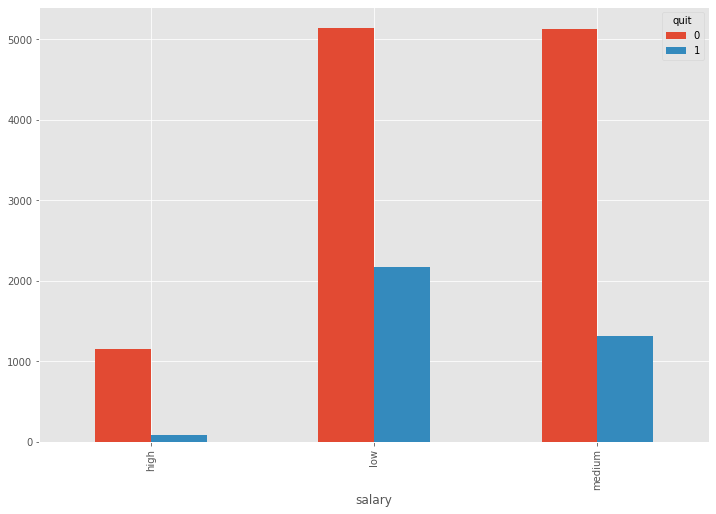

In [9]:
pd.crosstab(hr.salary, hr.quit).plot(kind='bar')
pd.title=('Freq of turnover')
pd.xlabel=('salary')
pd.ylabel=('Freq of turnover')
plt.show()

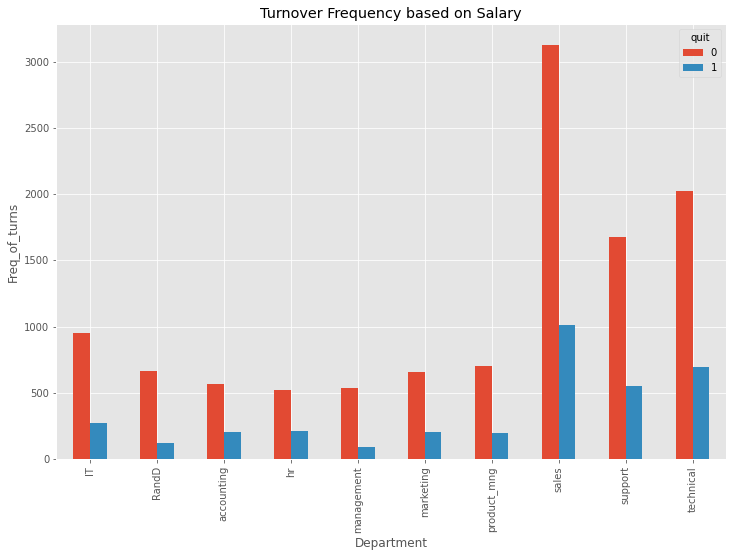

In [10]:
pd.crosstab(hr.department, hr.quit).plot(kind='bar')
plt.title("Turnover Frequency based on Salary")
plt.xlabel("Department")
plt.ylabel("Freq_of_turns")
plt.show()

Finished with EDA

We identified 2 categorical features 
1. salary
2. department

 One thing we have to overcome is that these are categorical variables
 They are in the string and object format, skitlearn can't take this type of data

 we will need to convert them into a format that will allow us to analyse them
 Such as decision tree classifiers/random forest classifiers
 We will use dummy, or one hot encoding next

### Task 3: Encode Categorical Features
---

In [11]:
# dummy encoding?
# 1 hot encoding? 

cat_var = ['department', 'salary']
for var in cat_var:
  cat_list = pd.get_dummies(hr[var], prefix=var)
  hr=hr.join(cat_list)

# why are we doing this?
# categorical -> numerical(?)
# we want to be able to tag the department each person is in 

In [12]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [13]:
# drpo the categorical columns
hr.drop(columns=['department','salary'], axis=1, inplace=True)

# KeyError: "['department' 'salary'] not found in axis" 
# means the columns are already dropped 

In [14]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Task 4: Visualize Class Imbalance
---

In [15]:
# yellow brick for visualisation/ML 
# helps us work with diagnostics

from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

In [16]:
pip install yellowbrick

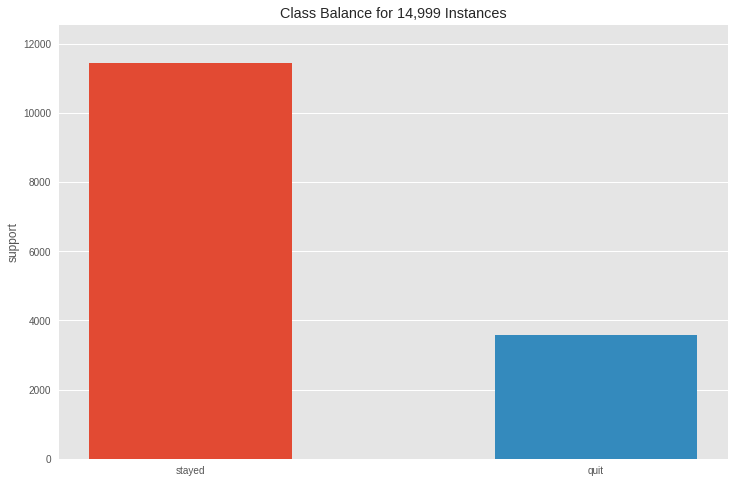

In [17]:
#create visualizer to see the class imbalance
visualiser = ClassBalance(labels = ('stayed', 'quit')).fit(hr.quit)
visualiser.poof()

### Task 5: Create Training and Test Sets
---

In [18]:
# -- we want: 
# target variable (quit): y axis
# all other features: x axis

x = hr.loc[:, hr.columns != 'quit']
y = hr.quit

In [19]:
# import test_train_split function 
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size = 0.2, stratify = y)

### Task 6 & 7: Build an Interactive Decision Tree Classifier
---

Supervised learning: 
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$

- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$

About:
 
 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption
 
- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.

#### Decision trees: partitioning the feature space:

![partition](https://github.com/daniel-dc-cd/data_science/blob/master/daily_materials/tree_forest/assets/partition-feature-space.png?raw=1)

- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

In [20]:
# we want to minimize loss and  variance
# look into: the critira for comparing; gini, entropy...etc

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [22]:
# this is a decorater function allowing us to include interactive elements to our graphs

@interact
def plot_tree(crit= ['gini', 'entropy'],
              split= ['best', 'random'],
              depth=IntSlider(min=1, max=30,value=2, continuous_update=False), # only update when mouse is released = save memory & time
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=2, continuous_update=False)):
  
  estimator = DecisionTreeClassifier(random_state=0,
                                     criterion=crit,
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf)
  
  estimator.fit(X_train, y_train)
  
  print('DT Training Accuracy: {:.3f}' .format(accuracy_score(y_train, estimator.predict(X_train))))
  print('DT Testing Accuracy: {:.3f}' .format(accuracy_score(y_test, estimator.predict(x_test))))

  # a 'beast' plotting lib 
  graph = Source(tree.export_graphviz(estimator,
                                     feature_names=X_train.columns,
                                     class_names=['stayed', 'quit'],
                                     filled=True))
  
  display(Image(data=graph.pipe(format='png')))

  return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 8: Build an Interactive Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [23]:
@interact
def plot_tree_rf(crit=['gini', 'entropy'],
                 bootstrap=['True', 'False'],
                 depth=IntSlider(min=1,max=7,value=2, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=2, continuous_update=False)):
  
   estimator = RandomForestClassifier(random_state=0,
                                      bootstrap=bootstrap,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf,
                                      n_jobs=1,
                                      verbose=False)

   estimator.fit(X_train, y_train)

   print('RF Training Accuracy: {:.3f}' .format(accuracy_score(y_train, estimator.predict(X_train))))
   print('RF Testing Accuracy: {:.3f}' .format(accuracy_score(y_test, estimator.predict(x_test))))

   num_tree = estimator.estimators_[0]   # grab one tree
   print('Visualizing Tree: ', 0)


   # a 'beast' plotting lib 
   graph = Source(tree.export_graphviz(num_tree,
                                      out_file=None,
                                      feature_names=X_train.columns,
                                      class_names=['stayed', 'quit'],
                                      filled=True))
    
   display(Image(data=graph.pipe(format='png')))


   return estimator
                                    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 9: Feature Importance and Evaluation Metrics
---

In [24]:
pip install yellowbrick

In [25]:
#from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features.importances import FeatureImportances

plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd060b6b7b8>,
                   labels=None, model=None, relative=True, stack=False,
                   xlabel=None)

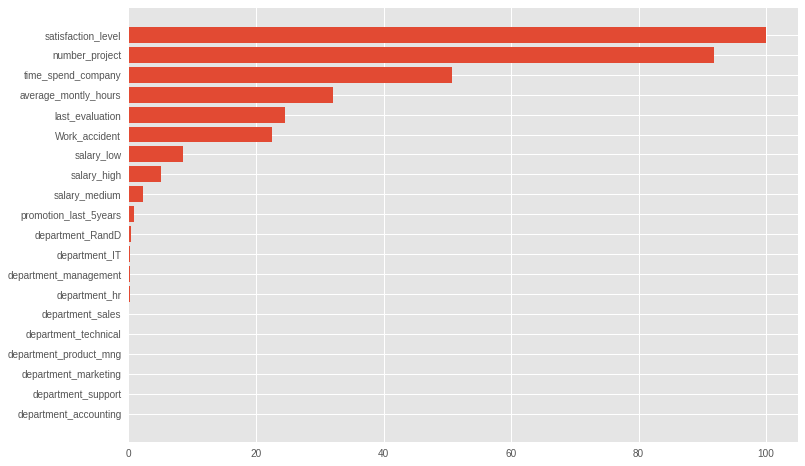

In [26]:
rf = RandomForestClassifier(bootstrap=True,
                           max_depth=2,
                           min_samples_leaf=2,
                           n_jobs=1,
                           random_state=0,
                           verbose=False)
viz = FeatureImportances(rf)
viz.fit(X_train, y_train)